## "Convolutional Neural Network Application"<br>
<img src="../CNN_FingerSign/images/multi_class.jpg" style="">
<caption><center><b> <font color="blue">Fig1. FingerSign dataset</captoin></center></b></font>

## Functional API

In [1]:
# importing fundamental packages:
# import:
import math
import h5py
import scipy
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl

# form:
from PIL import Image
from cnn_utils import *
from matplotlib.pyplot import imread
from test_utils import summary, comparator
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical

# magic command:
np.random.seed(1)
%matplotlib inline

### 1) loading the Data and split data into Train/Test sets:

- dataset => <b>Finger Signs dataset</b> => containing images of human's finger sign.
- type => <b>multi-Class classification</b> => finger signs, 0, 1, 2, 3, ..., 6

In [2]:
# loading the dataset => data sign:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [3]:
# preprocessing part:

# normalizing images:
X_train = X_train_orig / 255
X_test = X_test_orig / 255

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

# printing:
print(f"number of training example: {X_train.shape[0]}")
print(f"number of test example: {X_test.shape[0]}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

number of training example: 1080
number of test example: 120
X_train shape: (1080, 64, 64, 3)
X_test shape: (120, 64, 64, 3)
Y_train shape: (1080, 6)
Y_test shape: (120, 6)


y = 4


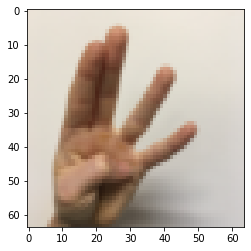

In [4]:
# visualizing our dataset:
# one image:
image_index = 9
plt.imshow(X_train_orig[image_index])
print ("y = " + str(np.squeeze(Y_train_orig[:, image_index])))
plt.show()

### Keras API Functional mode:
- in the Functional API, you can create a graph of layers.This is what allows such great flexibility.


In [5]:
# Creating convolutional model using Functional API:

def convolutional_model(input_shape):
    """
    Implemeting the forward propagation for the model:
    
    Conv2D => ReLU => MaxPool => Conv2D => ReLU => MaxPool => Flatten => Dense
    
    Arguments:
    input_image => input dataset, of shape (input_shape)
    
    Return:
    model => TF Keras model (object containig the informatoin for the entire training process.)
    
    """
    
    input_image = tf.keras.layers.Input(shape=input_shape)
    
    # Conv2D: 8 filters 4x4, stride of 1, padding 'same':
    Z1 = tf.keras.layers.Conv2D(filters=8,
                                kernel_size=(4,4),
                                strides=(1,1),
                                padding="same")(input_image)
    # Applying ReLU():
    A1 = tf.keras.layers.ReLU()(Z1)
    
    # MaxPool: window 8x8, stride 8, padding 'same':
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8),
                                   strides=(8,8),
                                   padding="same")(A1)
    
    # CONV2D: 16 filters 2x2, stride 1, padding 'same':
    Z2 = tf.keras.layers.Conv2D(filters=16,
                                kernel_size=(2,2),
                                strides=(1,1),
                                padding="same")(P1)
    
    # Applying ReLU():
    A2 = tf.keras.layers.ReLU()(Z2)
    
    # MaxPool: window 4x4, stride 4, padding 'same':
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4),
                                   strides=(4,4),
                                   padding="same")(A2)
    
    # Flatten layer:
    F = tf.keras.layers.Flatten()(P2)
    
    # Ouputs layer: (we have 6 classes => units=6 and activation = "softmax")
    outputs = tf.keras.layers.Dense(units=6, activation="softmax")(F)
    
    model = tf.keras.Model(inputs=input_image,
                           outputs=outputs)
    
    return model

In [6]:
# creating an object of the model:
conv_model = convolutional_model((64, 64, 3)) #input_shape =(64, 64, 3)

# compiling the model:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# summary of the model:
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0     

In [ ]:
# Training the Model:
conv_model.fit(x=X_train,
               y=Y_train,
               validation_data=(X_test, Y_test),
               epochs=100,
               batch_size=64)

Epoch 1/100
17/17 [==============================] - 6s 287ms/step - loss: 1.7977 - accuracy: 0.1889 - val_loss: 1.7905 - val_accuracy: 0.2250
Epoch 2/100
17/17 [==============================] - 5s 300ms/step - loss: 1.7874 - accuracy: 0.2139 - val_loss: 1.7859 - val_accuracy: 0.2167
Epoch 3/100
17/17 [==============================] - 5s 296ms/step - loss: 1.7818 - accuracy: 0.2278 - val_loss: 1.7779 - val_accuracy: 0.2250
Epoch 4/100
17/17 [==============================] - 5s 282ms/step - loss: 1.7738 - accuracy: 0.2269 - val_loss: 1.7719 - val_accuracy: 0.3333
Epoch 5/100
17/17 [==============================] - 5s 272ms/step - loss: 1.7662 - accuracy: 0.3324 - val_loss: 1.7639 - val_accuracy: 0.2667
Epoch 6/100
17/17 [==============================] - 5s 272ms/step - loss: 1.7539 - accuracy: 0.3417 - val_loss: 1.7505 - val_accuracy: 0.3917
Epoch 7/100
17/17 [==============================] - 5s 279ms/step - loss: 1.7359 - accuracy: 0.3657 - val_loss: 1.7351 - val_accuracy: 0.3667

Epoch 58/100
17/17 [==============================] - 5s 318ms/step - loss: 0.6096 - accuracy: 0.8046 - val_loss: 0.6875 - val_accuracy: 0.7917
Epoch 59/100
17/17 [==============================] - 5s 309ms/step - loss: 0.6029 - accuracy: 0.8111 - val_loss: 0.6858 - val_accuracy: 0.8000
Epoch 60/100
17/17 [==============================] - 5s 304ms/step - loss: 0.5996 - accuracy: 0.8231 - val_loss: 0.6998 - val_accuracy: 0.7667
Epoch 61/100
17/17 [==============================] - 5s 291ms/step - loss: 0.5949 - accuracy: 0.8046 - val_loss: 0.6725 - val_accuracy: 0.7667
Epoch 62/100
17/17 [==============================] - 5s 308ms/step - loss: 0.5802 - accuracy: 0.8176 - val_loss: 0.6602 - val_accuracy: 0.7750
Epoch 63/100
17/17 [==============================] - 5s 279ms/step - loss: 0.5777 - accuracy: 0.8167 - val_loss: 0.6652 - val_accuracy: 0.7917
Epoch 64/100
17/17 [==============================] - 5s 288ms/step - loss: 0.5855 - accuracy: 0.8157 - val_loss: 0.7017 - val_accuracy:

In [ ]:
# saving the model:
conv_model.save("./saved_model_2/FingerSigns.h5")

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(conv_model.history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'})
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'})
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [ ]:
# Testing our model:

# Test 1:
image_index = 10
Test_image_1 = X_test[image_index]

plt.imshow(Test_image_1)
plt.show()

# prediction of conv_model():
prediction = np.argmax(conv_model.predict(Test_image_1.reshape(1,64,64,3)), axis=1)
print(f"The number is {prediction}")

In [ ]:
# Test 2:
image_index = 0
Test_image_2 = X_test[image_index]

plt.imshow(Test_image_2)
plt.show()

# prediction of conv_model():
prediction = np.argmax(conv_model.predict(Test_image_2.reshape(1,64,64,3)), axis=1)
print(f"The number is {prediction}")

## The End